# Task 2: Цифровое представление основных типов данных

## ДЗ №1

1. Поместить в центр рисунка белый квадрат, занимающий 10% площади рисунка.

In [ ]:
%%capture
!pip install scikit-image

Значение этой переменной – доля площади изображения, которую будет занимать квадрат

In [2]:
square_area_fraction = 0.1

Загрузим изображение

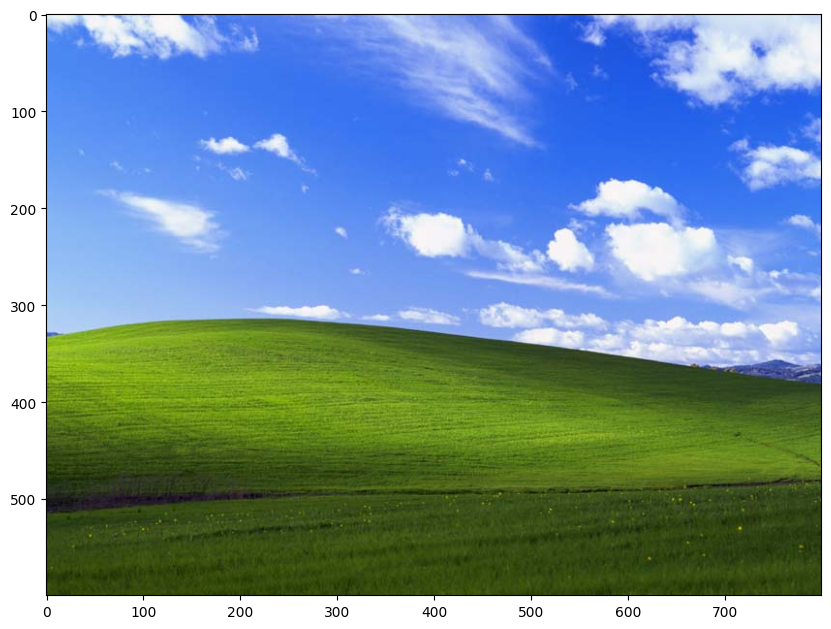

In [3]:
import matplotlib.pyplot as plt
from skimage.io import imread

image = imread('https://upload.wikimedia.org/wikipedia/ru/1/1d/%D0%91%D0%B5%D0%B7%D0%BC%D1%8F%D1%82%D0%B5%D0%B6%D0%BD%D0%BE%D1%81%D1%82%D1%8C.png')

plt.figure(figsize=(10, 10))
plt.imshow(image)

In [4]:
image.shape

(600, 800, 3)

Вычислим площадь изображения

In [5]:
image_area = image.shape[0] * image.shape[1]
image_area

480000

Вычислим длину стороны квадрата (с округлением вверх, квадрат будет занимать долю площади изображения, не меньшую заданной)

In [6]:
from math import sqrt, ceil

square_size = ceil(sqrt(image_area * square_area_fraction))
square_size

220

Найдем координаты верхнего левого угла квадрата

In [7]:
vertical_offset = (image.shape[0] - square_size) // 2
horizontal_offset = (image.shape[1] - square_size) // 2
vertical_offset, horizontal_offset

(190, 290)

Добавим на изображение квадрат и выведем изображение на экран

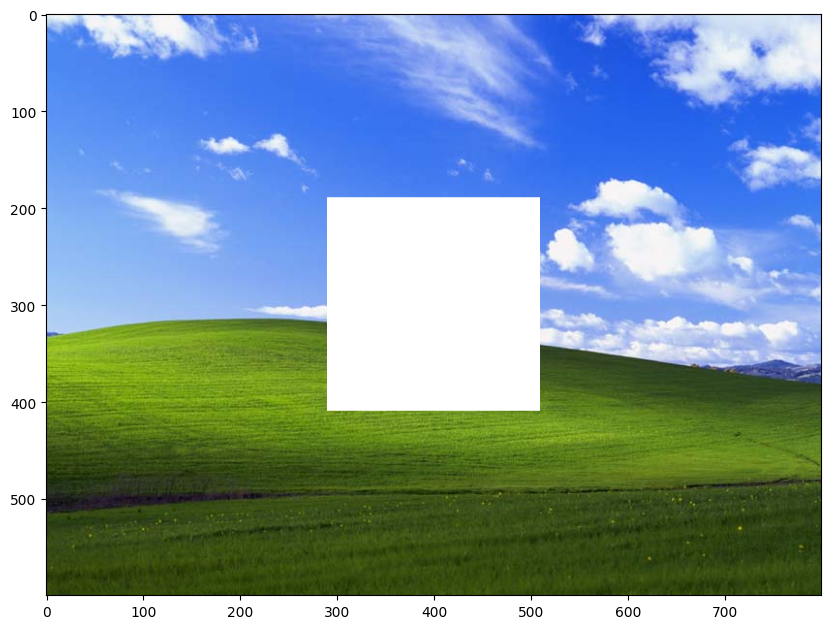

In [8]:
import numpy as np

new_image = image.copy()

channels_count = image.shape[2]

for row in range(vertical_offset, vertical_offset + square_size):
    for column in range(horizontal_offset, horizontal_offset + square_size):
        new_image[row, column] = np.full(channels_count, 255)

plt.figure(figsize=(10, 10))
plt.imshow(new_image)

## ДЗ №2

1. Поместить в в случайном месте каждого кадра видеопотока белый кварат со стороной 50 px.

Значение этой переменной – длина стороны квадрата

In [23]:
square_size = 50

In [17]:
%%capture
!pip install opencv-python

Эта функция добавляет на изображение (кадр видеопотока) квадрат с заданной длиной стороны, находящийся в случайном месте

In [31]:
import random


# noinspection PyShadowingNames
def draw_random_square(image, size):
    row_start = random.randint(0, image.shape[0] - size)
    column_start = random.randint(0, image.shape[1] - size)
    channels_count = image.shape[2]

    new_image = image.copy()

    for row in range(row_start, row_start + size):
        for column in range(column_start, column_start + size):
            new_image[row, column] = np.full(channels_count, 255)

    return new_image

Добавим квадрат в видеопоток с веб-камеры

In [32]:
import cv2


capture = cv2.VideoCapture(0 + cv2.CAP_DSHOW)

while True:
    rtrn, image = capture.read()
    if image is None:
        from skimage import io
        image = io.imread('https://upload.wikimedia.org/wikipedia/ru/1/1d/%D0%91%D0%B5%D0%B7%D0%BC%D1%8F%D1%82%D0%B5%D0%B6%D0%BD%D0%BE%D1%81%D1%82%D1%8C.png')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    new_image = draw_random_square(image, square_size)
    cv2.imshow("OpenCV", new_image)

    if cv2.waitKey(1) == 27:
        break

capture.release()
cv2.destroyAllWindows()

## ДЗ №3

1. Найти в обучающем наборе esc50-dataset WAV файл с лаем собаки;
2. визуально по графику амплитуды звуковой волны найти участок файла непосредственно содержащий звук лая;
3. построить спектрограмму для найденного участка;
4. подумать (и реализовать), как с помощиью цифрового представления звука можно автоматизировать удаление части файла, не содержащего полезной информации.

In [33]:
%%capture
!pip install librosa

Загрузим файл

In [60]:
import requests

response = requests.get("https://dagshub.com/kinkusuma/esc50-dataset/raw/3b812aa828f357df417069600a096c31816c5ef3/dataset/1-100032-A-0.wav")
audio = response.content

In [61]:
import IPython.display as ipd
ipd.Audio(audio)

In [62]:
import numpy as np
import soundfile as sf
import io

audio_data, sample_rate = sf.read(io.BytesIO(audio))
audio_data

array([0., 0., 0., ..., 0., 0., 0.])

In [63]:
sample_rate

44100

In [69]:
seconds = audio_data.shape[0] / sample_rate
seconds

5.0

Построим график амплитуды звуковой волны

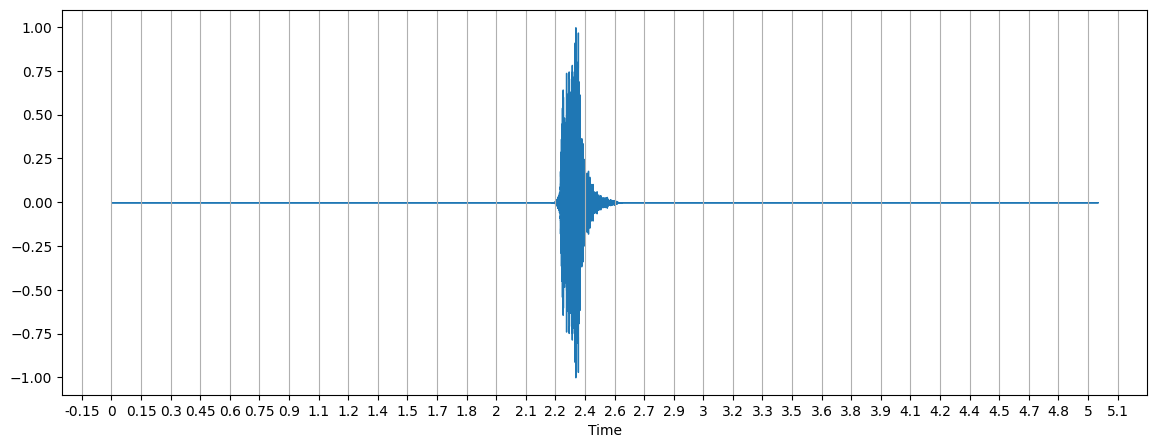

In [74]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio_data, sr=sample_rate)
plt.locator_params(axis='x', nbins=40)
plt.gca().xaxis.grid(True)

Рассмотрим визуально найденный участок файла, непосредственно содержащий звук лая

In [77]:
def seconds_to_index(seconds, sample_rate):
    return int(seconds * sample_rate)

In [78]:
actual_audio_data = audio_data[seconds_to_index(2.2, sample_rate):seconds_to_index(2.6, sample_rate)]
actual_audio_data

array([0., 0., 0., ..., 0., 0., 0.])

Построим график амплитуды звуковой волны этого участка

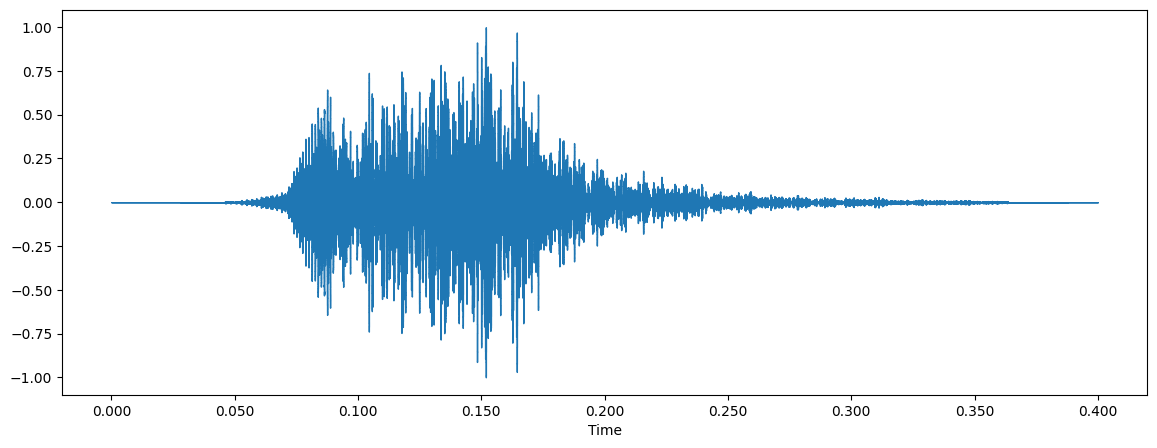

In [86]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(actual_audio_data, sr=sample_rate)

Построим спектрограмму найденного участка

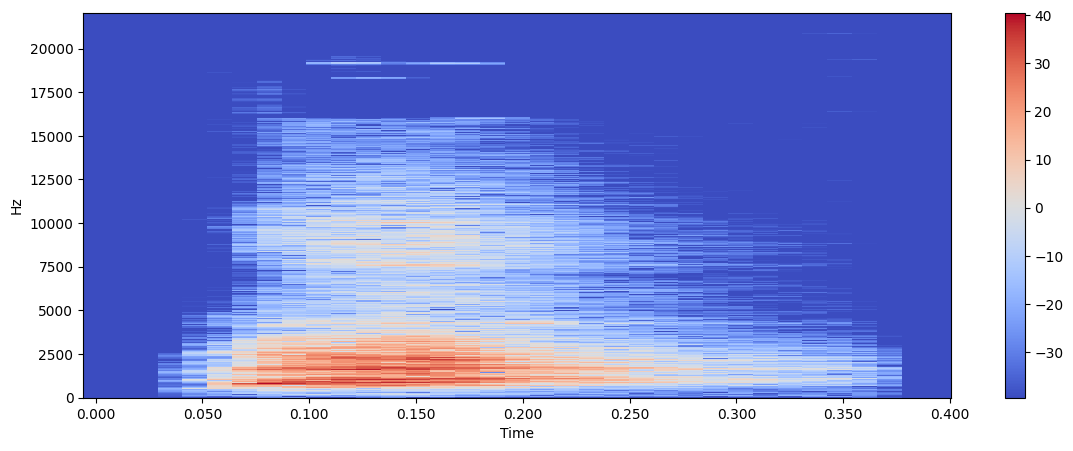

In [81]:
X = librosa.stft(actual_audio_data)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

Автоматизируем удаление части файла, не содержащего полезной информации, следующим образом:

Удалим начало файла до первого вхождения в него порогового значения, и конец файла после последнего вхождения в него порогового значения

In [97]:
def range_closed(start, stop, step):
    return range(start, stop - 1, step)

In [101]:
def remove_empty_audio_parts(data, threshold):
    for i in range(len(data)):
        if abs(data[i]) > threshold:
            break
    start_i = i
    for i in range_closed(len(data) - 1, 0, -1):
        if abs(data[i]) > threshold:
            break
    end_i = i
    return data[start_i:end_i + 1]

При пороговом значении 0.01 получается такой результат. Части файла, не содержащие полезной информации, успешно удалены

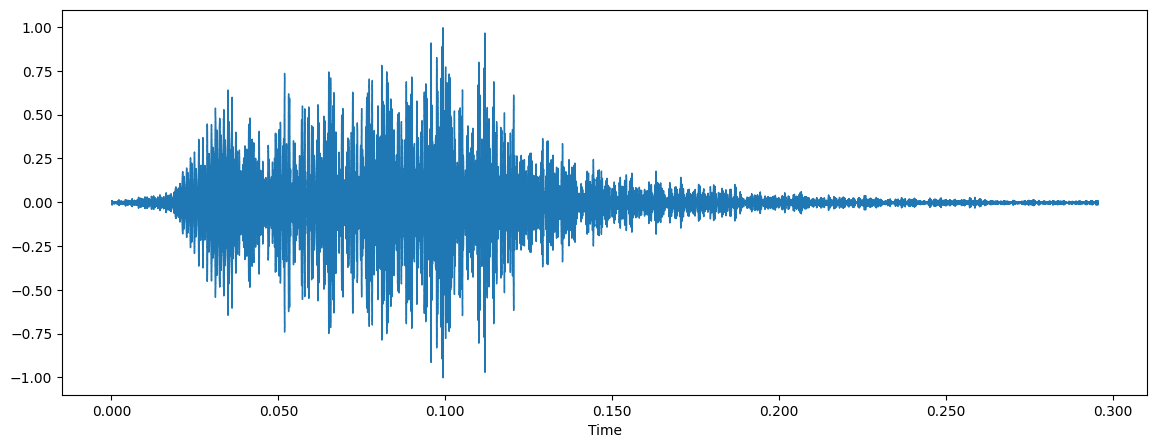

In [103]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(remove_empty_audio_parts(audio_data, 0.01), sr=sample_rate)

## ДЗ №4

1. Выбрать любой казанский автобусный маршрут;
2. проследить с помощью API сайта data.kzn.ru за автобусом выбранного маршрута достаточное количество времени, чтобы сформировать представление о всём пути следования автобуса;
3. изобразить маршрут на карте;
4. подумайте, как найти правильный центр рисунка;
5. подумайте как найти и указать на рисунке остановки выбранного маршрута.

In [1]:
%%capture
!pip install requests

In [5]:
%%capture
!pip install pause

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pause: filename=pause-0.3-py3-none-any.whl size=6091 sha256=1b3254ea2b681aa74cb993e56d85fa0987dfafe4a8d028c998a133c7bae8f727
  Stored in directory: c:\users\artemgur\appdata\local\pip\cache\wheels\44\f8\f3\8252b5c2e6d63d1bce568e9103d154ca3241777ac4ffbfec2f
Successfully built pause


Найдем автобус (его GaragNumb) заданного маршрута

In [1]:
requests_timeout = 120

In [2]:
import requests
import json


def find_bus_with_route(route: str):
    response_json_str = requests.get('http://data.kzn.ru:8082/api/v0/dynamic_datasets/bus.json', timeout=requests_timeout).text
    for response in json.loads(response_json_str):
        response_route_number = response['data']['Marsh']
        if response_route_number == route:
            return response['data']['GaragNumb']
    return None

In [3]:
bus_id = find_bus_with_route('29')
bus_id

'2673'

С помощью этой функции можно было бы получить список местоположений автобуса за заданный период времени, если бы тип запроса 3 работал бы согласно документации

In [4]:
# noinspection PyShadowingNames
# Time format: yyyy-mm-dd
def get_bus_locations(bus_id: str, time_from: str, time_to: str):
    response_json_str = requests.get(f'http://data.kzn.ru:8082/api/v0/dynamic_datasets/bus/{bus_id}/interval.json?time_from={time_from}&time_to={time_to}').text
    print(response_json_str)
    result = []
    for response in json.loads(response_json_str):
        result.append(float(response['data']['Latitude']), float(response['data']['Longitude']))
    return result

Но запросы 3 и 4 не работают, поэтому исторические данные получить не удастся, и придется собирать их в реальном времени. Полученные данные будем сохранять в файл

In [ ]:
import pause
from datetime import datetime, timedelta


queries_count = 240

time_between_queries = timedelta(seconds=15)
time_to_pause = datetime.now()

with open('bus_locations.txt', 'a') as file:
    for i in range(queries_count):  # int(data_collection_minutes / minutes_between_queries)):
        time_to_pause += time_between_queries
        response_text = requests.get(f'http://data.kzn.ru:8082/api/v0/dynamic_datasets/bus/{bus_id}.json', timeout=requests_timeout).text
        response_json = json.loads(response_text)

        file.write(str(float(response_json['data']['Latitude'])))
        file.write(' ')
        file.write(str(float(response_json['data']['Longitude'])))
        file.write('\n')

        print(i)
        pause.until(time_to_pause)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


Загрузим координаты автобуса из файла

In [16]:
def readlines(file):
    return map(lambda x: x.rstrip(), file.readlines())

with open('bus_locations.txt', 'r') as file:
    locations = list(map(lambda x: tuple(map(lambda y: float(y), x.split(' '))), readlines(file)))

In [17]:
locations

[(55.837442, 49.08112),
 (55.839273, 49.081342),
 (55.841547, 49.082885),
 (55.847238, 49.084313),
 (55.847238, 49.084313),
 (55.848427, 49.082203),
 (55.848735, 49.074492),
 (55.848735, 49.074492),
 (55.848735, 49.074492),
 (55.848735, 49.074492),
 (55.848735, 49.074492),
 (55.848735, 49.074492),
 (55.848735, 49.074492),
 (55.848985, 49.068755),
 (55.848985, 49.068755),
 (55.848985, 49.068755),
 (55.848985, 49.068755),
 (55.849288, 49.065078),
 (55.849288, 49.065078),
 (55.849288, 49.065078),
 (55.849288, 49.065078),
 (55.850142, 49.055352),
 (55.850142, 49.055352),
 (55.850142, 49.055352),
 (55.850142, 49.055352),
 (55.850473, 49.049763),
 (55.850473, 49.049763),
 (55.850473, 49.049763),
 (55.850978, 49.040465),
 (55.850978, 49.040465),
 (55.850978, 49.040465),
 (55.850978, 49.040465),
 (55.850978, 49.040465),
 (55.85197, 49.033218),
 (55.85197, 49.033218),
 (55.85197, 49.033218),
 (55.85197, 49.033218),
 (55.855457, 49.025175),
 (55.855457, 49.025175),
 (55.855457, 49.025175),
 (55.

Координатами центра карты будут средняя широта и долгота координат автобуса

In [18]:
from statistics import fmean

lat_mean = fmean(map(lambda x: x[0], locations))
lon_mean = fmean(map(lambda x: x[1], locations))
center = (lat_mean, lon_mean)
center

(55.83888223827392, 49.066263990619134)

In [19]:
%%capture
!pip install ipyleaflet
!jupyter nbextension enable --py --sys-prefix ipyleaflet

Маршрут на карте решил изобразить в виде точек, так как для того, чтобы получить набор последовательно идущих точек, покрывающих весь маршрут, нужно непрерывно запрашивать данные несколько часов, что сложно из-за нестабильной работы сервера.

Набор точек, покрывающий весь маршрут, который я отображаю на карте, был собран мной по частям в разное время, поэтому точки в нем не идут последовательно, что не позволяет построить AntPath.

In [28]:
from ipyleaflet import WidgetControl, Map, Circle, LayerGroup
from ipywidgets import IntSlider, jslink


m = Map(center=center, zoom=11)

circles = list(map(lambda x: Circle(location=x, radius=30, color='green', fill_color='green'), locations))
layer_group = LayerGroup(layers=circles)
m.add_layer(layer_group)

zoom_slider = IntSlider(description='Масштаб:', min=1, max=19, value=11)
jslink((zoom_slider, 'value'), (m, 'zoom'))
widget_control1 = WidgetControl(widget=zoom_slider, position='topright')
m.add_control(widget_control1)

m

Map(center=[55.83888223827392, 49.066263990619134], controls=(ZoomControl(options=['position', 'zoom_in_text',…

Поиск остановок на основе этих данных – сложная задача. Недостаточно просто найти точки, где автобус останавливается, так как автобус останавливается и, например, на красный сигнал светофора на перекрестках.

Теоретически, можно было бы собрать много данных по координатам автобусов маршрута, и найти точки, где автобусы останавливаются каждый раз (считая точки в каком-то радиусе одной точкой). Но собрать такое количество данных проблематично, так как не работают запросы к историческим данным, и к тому же сервер работает медленно и нестабильно. Кроме того, в общем случае этот метод будет принимать знаки "стоп" ("Движение без остановки запрещено") за остановки.

## ДЗ № 5

1. Создайте приложения для работы с API VK;
2. получите свой токен для автоматизации действий в соцсети;
3. соберите не менее 2000 не пустых текстовых сообщений со стены любой открытой группы;
4. сохраните сообщения во внешний файл для дальнейшего чтения и работы.

In [28]:
import requests
import json


# noinspection PyShadowingNames
def get_text(access_token, group_id, offset: int):
    response_json_str = requests.get(
        f'https://api.vk.com/method/wall.get?access_token={access_token}&v=5.194&owner_id={group_id}&count=1&offset={offset}').text
    parsed = json.loads(response_json_str)
    #print(parsed)
    return str(parsed['response']['items'][0]['text'])

In [31]:
access_token = "32797754327977543279775425320fcc36332793279775452389e04a9aeaa9a29fcfab7"
group_id = -35488145

posts_with_text_to_process = 20
filename = 'posts.txt'

posts_separator = '\n\n\n\n\n'

with open(filename, 'w', encoding="utf-8") as file:
    posts_offset = 0
    posts_with_text_found = 0
    while True:
        text = get_text(access_token, group_id, posts_offset)
        posts_offset += 1

        if text != '':
            posts_with_text_found += 1
            file.write(text)
            file.write(posts_separator)

        if posts_with_text_found >= posts_with_text_to_process:
            break